In [1]:
!git clone https://github.com/javadseraj/bearing-fault-detection.git

Cloning into 'bearing-fault-detection'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 18 (delta 6), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


In [2]:
! unzip /content/bearing-fault-detection/01-cwru-selected-data-3class-inner-outer-normal.zip

Archive:  /content/bearing-fault-detection/01-cwru-selected-data-3class-inner-outer-normal.zip
  inflating: 01-cwru-selected-data-3class-inner-outer-normal/B007_B014_1_123.csv  
  inflating: 01-cwru-selected-data-3class-inner-outer-normal/IR007_IR014_1_110.csv  
  inflating: 01-cwru-selected-data-3class-inner-outer-normal/OR007_OR014_6_1_136.csv  


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pywt
import glob

In [4]:
files = glob.glob('/content/01-cwru-selected-data-3class-inner-outer-normal/*.csv')
files

['/content/01-cwru-selected-data-3class-inner-outer-normal/IR007_IR014_1_110.csv',
 '/content/01-cwru-selected-data-3class-inner-outer-normal/OR007_OR014_6_1_136.csv',
 '/content/01-cwru-selected-data-3class-inner-outer-normal/B007_B014_1_123.csv']

In [82]:
count = 0
data = np.empty((460*2*3,32,32))
data[:] = np.nan
for file in files:
    temp = pd.read_csv(file, header = None)
    for j in range(460*2):
        segment = temp[0][(j*1024):((j+1)*1024)].values
        print("segment : " , segment.shape)
        data[count,:,:] = tf.reshape(tf.image.resize(segment.reshape((1,1024,1)),(32,32)),(32,32))
        if (count % 100) == 0:
            print(f"{count} data points extracted")
        count = count + 1
fault_types = ['Ball_007_Ball_014', 'IR_007_IR_014', 'OR_007_OR_014']
labels = np.repeat(fault_types, 460*2)
np.savez('CWRU_48k_load_1_CNN_raw_data_3class', data = data, labels = labels)

segment :  (1024,)


ValueError: ignored

try to reshape data


In [83]:
count = 0
data = np.empty((460*2*3,32,32))
data[:] = np.nan
one_split_data = np.empty((3,460*2*32*32))
i = 0
for file in files:
    temp = pd.read_csv(file, header = None)
    print(temp)
    print(len(temp) , type(temp))
    # tp = temp.reshape((len(temp),1))
    one_split_data[i,:] = temp[0][0:460*2*32*32]
    print("oop!")
    i += 1
               
fault_types = ['Ball_007_Ball_014', 'IR_007_IR_014', 'OR_007_OR_014']
labels = np.repeat(fault_types, 460*2)
np.savez('CWRU_48k_load_1_CNN_raw_data_3class', data = data, labels = labels)

               0
0       0.032127
1       0.078231
2       0.161468
3       0.250547
4       0.315426
...          ...
975344  0.191092
975345  0.324397
975346  0.413684
975347  0.462709
975348  0.453113

[975349 rows x 1 columns]
975349 <class 'pandas.core.frame.DataFrame'>
oop!
               0
0       0.084719
1       0.694860
2       1.159769
3       1.397232
4       1.413508
...          ...
971282  0.092208
971283  0.102639
971284  0.095546
971285  0.084489
971286  0.075102

[971287 rows x 1 columns]
971287 <class 'pandas.core.frame.DataFrame'>
oop!
               0
0      -0.041097
1      -0.046104
2      -0.028372
3       0.001252
4       0.033796
...          ...
973603 -0.095546
973604 -0.084489
973605 -0.068843
973606 -0.049025
973607 -0.016481

[973608 rows x 1 columns]
973608 <class 'pandas.core.frame.DataFrame'>
oop!


In [102]:
one_split_data[:, 1].size

3

In [126]:
# my_data = np.ndarray((460*2*3, 32, 32))
# my_data = np.nan
# count = 0
# for i in range(one_split_data[:,1].size):
#     seg = one_split_data[i].reshape((one_split_data[0].size//1024,32,32))
#     print(type(seg[0]))
#     for j in range(460*3*2):
#         a = int(j*count)
#         my_data[j*count, :, :] =(seg[j])
#     print(my_data.shape)
#     count = count+1

# fault_types = ['Ball_007_Ball_014', 'IR_007_IR_014', 'OR_007_OR_014']
# labels = np.repeat(fault_types, 460*2)
# np.savez('CWRU_48k_load_1_CNN_raw_data_3class', data = data, labels = labels)

<class 'numpy.ndarray'>


TypeError: ignored

In [133]:
split_0= one_split_data[0].reshape((one_split_data[0].size//1024,32,32))
split_1 = one_split_data[1].reshape((one_split_data[1].size//1024,32,32))
split_2 = one_split_data[1].reshape((one_split_data[2].size//1024,32,32))

all_my_data = np.concatenate((split_0, split_1, split_2), axis = 0)

In [134]:
all_my_data.shape

(2760, 32, 32)

In [144]:
fault_types = ['Ball_007_Ball_014', 'IR_007_IR_014', 'OR_007_OR_014']
labels = np.repeat(fault_types, 460*2)
np.savez('CWRU_48k_load_1_CNN_raw_data_3class_v2', data = all_my_data, labels = labels)

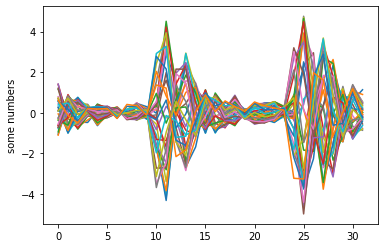

In [141]:
import matplotlib.pyplot as plt
#plt.plot(split_2[0][:][:])
plt.plot(all_my_data[920][:][:])
plt.ylabel('some numbers')
plt.show()

In [52]:
temp

,0
0,-0.041097
1,-0.046104
2,-0.028372
3,0.001252
4,0.033796
...,...
973603,-0.095546
973604,-0.084489
973605,-0.068843
973606,-0.049025


In [46]:
data.shape

(2760, 32, 32)

In [47]:
data

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [17]:

# files = glob.glob('/content/01-cwru-selected-data-3class-inner-outer-normal/*.csv')
# data = np.empty((460*2*3,32,32))
# data[:] = np.nan

# count = 0
# for file in files:
#     temp = pd.read_csv(file, header = None)
#     for j in range(460*2):
#         segment = temp[0][(j*1024):((j+1)*1024)].values
#         print("segment shape :", segment.shape)
#         coefs,_ = pywt.cwt(segment,np.arange(1,2049,32), 'morl')
#         print("coef shape : ", coefs.shape)
#         data[count,:,:] = tf.reshape(tf.image.resize(coefs.reshape((64,1024,1)),(32,32)),(32,32))
#         if (count % 100) == 0:
#             print(f"{count} data points extracted")
#         count = count + 1
# fault_types = ['Ball_007_Ball_014', 'IR_007_IR_014', 'OR_007_OR_014']
# labels = np.repeat(fault_types, 460*2)
# # Save wavelet data
# np.savez('CWRU_48k_load_1_CNN_wavelet_morlet_data_3class', data = data, labels = labels)

segment shape : (1024,)
coef shape :  (64, 1024)
0 data points extracted
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 1024)
segment shape : (1024,)
coef shape :  (64, 10

KeyboardInterrupt: ignored

In [146]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [147]:
print("Tensorflow version: ", tf.__version__)
print("Numpy version: ", np.__version__)
print("Pandas version: ", pd.__version__)
print("Scikit-learn version: ", sklearn.__version__)

Tensorflow version:  2.5.0
Numpy version:  1.19.5
Pandas version:  1.1.5
Scikit-learn version:  0.22.2.post1


In [145]:

# Run the notebook after cloning the repo
file = np.load('/content/CWRU_48k_load_1_CNN_raw_data_3class_v2.npz') # Give path to downloaded file in your system
print(file.files)

['data', 'labels']


In [148]:
data = file["data"]
labels = file["labels"]
print(data.shape, labels.shape)

(2760, 32, 32) (2760,)


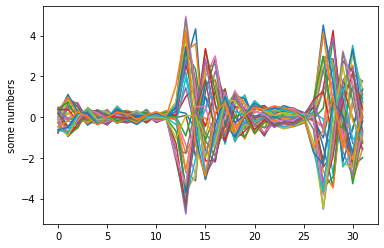

In [149]:
import matplotlib.pyplot as plt
plt.plot(data[2000][:][:])
plt.ylabel('some numbers')
plt.show()

In [150]:
category_labels = np.unique(labels)
print(category_labels)

['Ball_007_Ball_014' 'IR_007_IR_014' 'OR_007_OR_014']


In [151]:
labels = pd.Categorical(labels, categories = category_labels).codes

In [152]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 522, random_state = 829, 
                                                                    stratify = labels)

In [153]:
# reshape data
train_data = train_data.reshape(len(train_data),32,32,1)
test_data = test_data.reshape(len(test_data),32,32,1)

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Shuffle data
index = np.random.permutation(len(train_labels))
trian_data, trian_labels = train_data[index], train_labels[index]

print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape )

(2238, 32, 32, 1) (2238, 3) (522, 32, 32, 1) (522, 3)


In [154]:
demo_model = Sequential([
    layers.Conv2D(32,9,activation= 'relu', input_shape = (32,32,1)),
    layers.MaxPool2D(2),
    layers.Conv2D(32,9,activation = 'relu'),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(96, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')
])
demo_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        2624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 32)          82976     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 96)                6

In [155]:
def create_compiled_model():
    model = Sequential([
    layers.Conv2D(32,9,activation= 'relu', input_shape = (32,32,1)),
    layers.MaxPool2D(2),
    layers.Conv2D(32,9,activation = 'relu'),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(96, activation = 'relu'),
    layers.Dense(3, activation = 'softmax')
    ])
    model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001), 
                  metrics= ['accuracy'])
    return model

In [156]:
res = np.empty(10)
res[:] = np.nan
for i in range(10):
    model = create_compiled_model()
    history = model.fit(train_data, train_labels, epochs = 45, batch_size = 128, verbose = 0)    # Verbosity is set to zero
    res[i] = model.evaluate(test_data, test_labels, batch_size = 128, verbose = 0)[1]            # Verbosity is set to zero
    print('Loop iteration %d, Accuracy: %4.4f' % (i+1, res[i]))
    if res[i]>=np.max(res[:(i+1)]):
        best_model = model

Loop iteration 1, Accuracy: 0.5192
Loop iteration 2, Accuracy: 0.5498
Loop iteration 3, Accuracy: 0.5287
Loop iteration 4, Accuracy: 0.5556
Loop iteration 5, Accuracy: 0.5632
Loop iteration 6, Accuracy: 0.5345
Loop iteration 7, Accuracy: 0.5383
Loop iteration 8, Accuracy: 0.5536
Loop iteration 9, Accuracy: 0.5479
Loop iteration 10, Accuracy: 0.5900


In [157]:

print('Average accuracy:%4.4f'%(np.mean(res))) # After running the model 10 times
print("Best accuracy: %4.4f"%(np.max(res)))
print("Worst accuracy: %4.4f"%(np.min(res)))
print('Standard deviation: %4.4f' % (np.std(res)))

Average accuracy:0.5481
Best accuracy: 0.5900
Worst accuracy: 0.5192
Standard deviation: 0.0189


In [158]:
tf.keras.models.save_model(best_model, "CWRU_CNN_raw_time_domain_data.h5")

In [159]:
prediction = best_model.predict(test_data)
prediction_labels = list([])
for each_prediction in prediction:
    prediction_labels.append(list(each_prediction).index(max(each_prediction)))

In [160]:
from sklearn.metrics import confusion_matrix
true_labels = np.argmax(test_labels, axis = 1)
matrix = confusion_matrix(true_labels, prediction_labels)

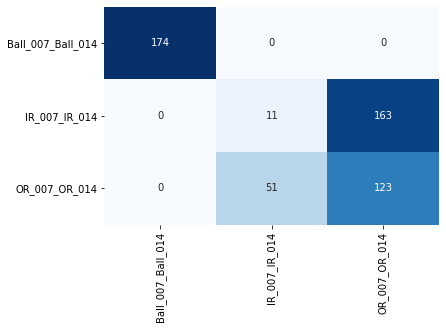

In [161]:

import seaborn as sns
matrix = pd.DataFrame(matrix)
plt.figure()
sns.heatmap(matrix, annot= True, fmt = "d",
           xticklabels = category_labels,
           yticklabels = category_labels, cmap = "Blues", cbar = False)
plt.xticks(rotation = 90)
plt.show()